In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


# **IMPORTING LIBRARIES**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv")
test=pd.read_csv("/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv")

In [4]:
train.head(4)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0


In [5]:
test.head(4)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39


In [6]:
# checking shape of the train data

train.shape

(19158, 14)

In [7]:
# checking shape of the test data

test.shape

(2129, 13)

In [8]:
# basic descriptive statistics view for train data

train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
# basic descriptive statistics view for test data

test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [10]:
# missing values in train data

train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# **DATA EXPLORATION**

In [12]:
# target: 0 – Not looking for job change, 1 – Looking for a job change

train["target"].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

The data is imbalanced. most of the candidates/employee wants to work with the company .

<Axes: xlabel='target', ylabel='count'>

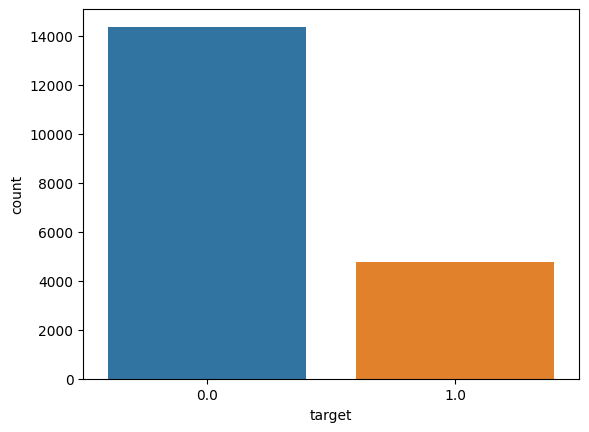

In [13]:
sns.countplot(x="target",data=train)

In [14]:
train["education_level"].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

<Axes: xlabel='education_level', ylabel='count'>

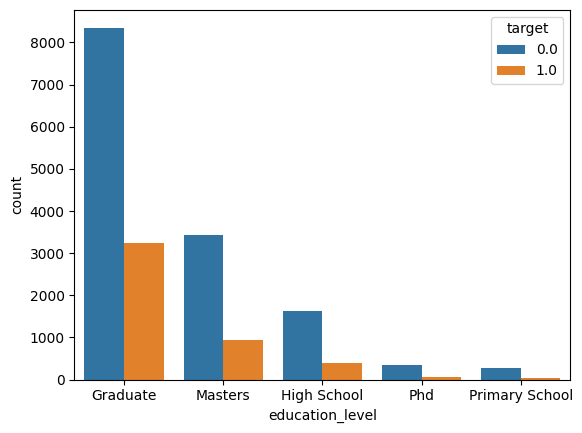

In [15]:
sns.countplot(x="education_level", data=train , hue="target")
# 'hue' is used to visualize the data of different categories in one plot.

<Axes: xlabel='gender', ylabel='count'>

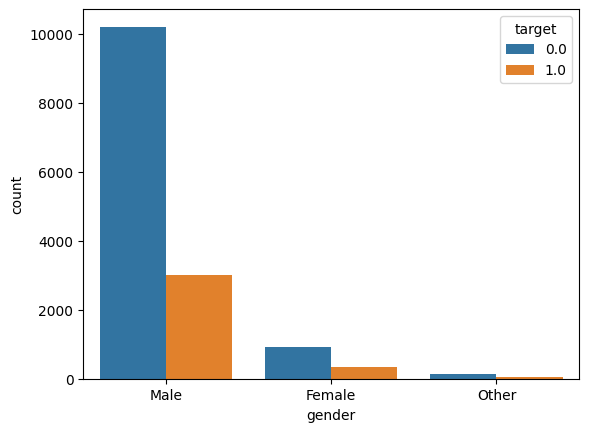

In [16]:
sns.countplot(x="gender" , data=train , hue="target")

In [17]:
train["relevent_experience"].value_counts()

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

<Axes: xlabel='relevent_experience', ylabel='count'>

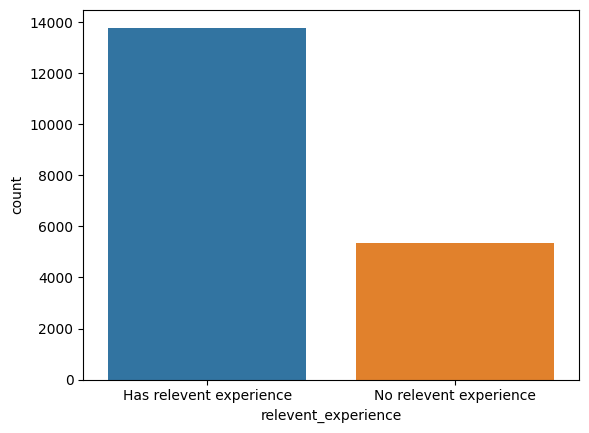

In [18]:
sns.countplot(x="relevent_experience", data=train )

<Axes: xlabel='relevent_experience', ylabel='count'>

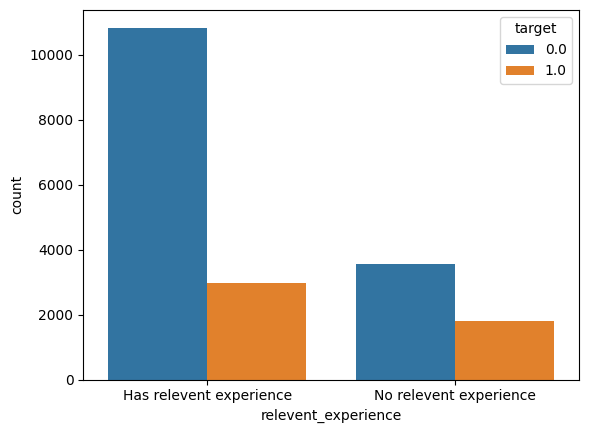

In [19]:
sns.countplot(x="relevent_experience", data=train , hue="target")

In [20]:
train["enrolled_university"].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

<Axes: xlabel='enrolled_university', ylabel='count'>

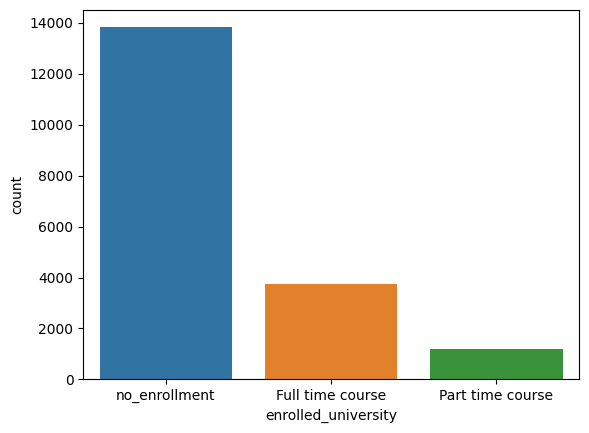

In [21]:
sns.countplot(x="enrolled_university", data=train )

<Axes: xlabel='enrolled_university', ylabel='count'>

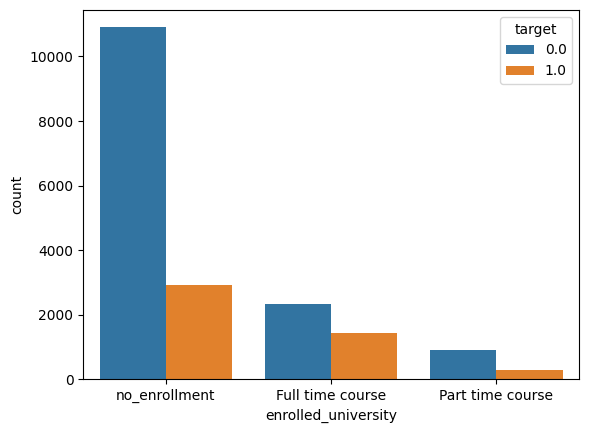

In [22]:
sns.countplot(x="enrolled_university" , data=train , hue="target")

In [23]:
train["major_discipline"].value_counts()
    

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

<Axes: xlabel='major_discipline', ylabel='count'>

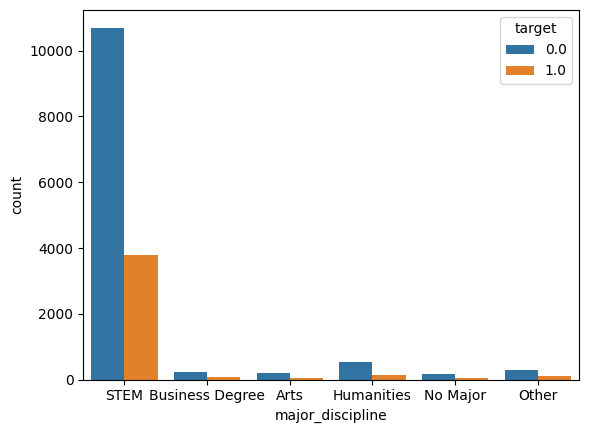

In [24]:
sns.countplot(x="major_discipline" , data=train , hue="target")

<Axes: xlabel='experience', ylabel='count'>

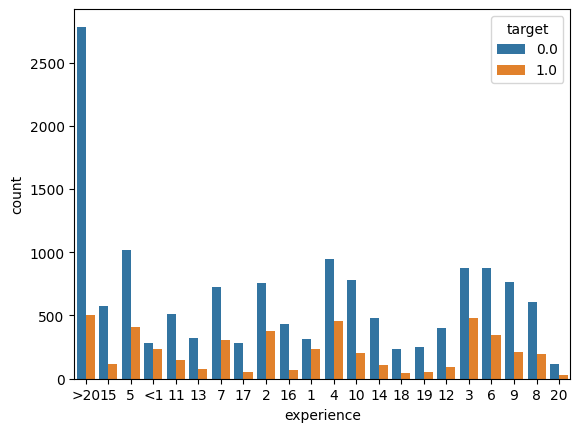

In [25]:
sns.countplot(x="experience" , data=train , hue="target")

<Axes: xlabel='last_new_job', ylabel='count'>

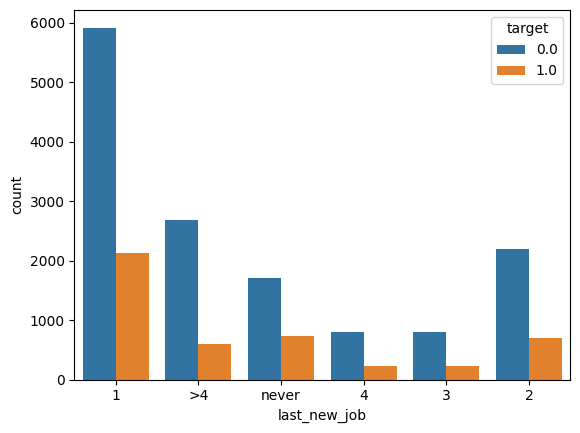

In [26]:
sns.countplot(x="last_new_job", data=train , hue="target")

<Axes: xlabel='training_hours', ylabel='Count'>

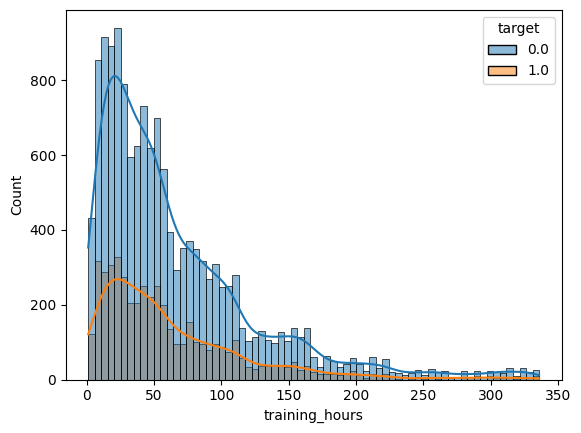

In [27]:
sns.histplot(x="training_hours", data=train , hue="target",kde=True )

1. **Data is imbalance as per target feature**
2. **Company type, Gender, city, city development index & major discipline data is completed imbalance & one sided hence will not going to consider this feature for training**

<Axes: ylabel='enrollee_id'>

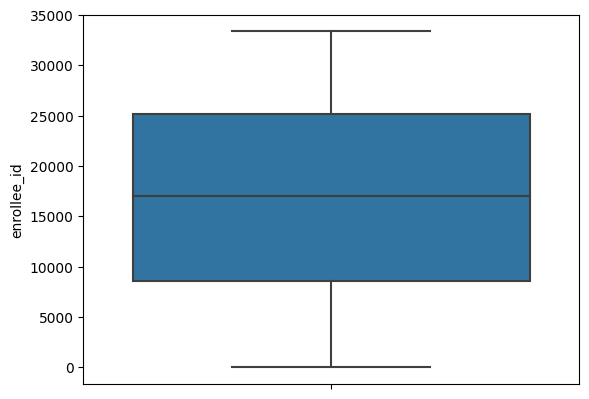

In [28]:
sns.boxplot(y="enrollee_id",data=train)
      

<Axes: ylabel='city_development_index'>

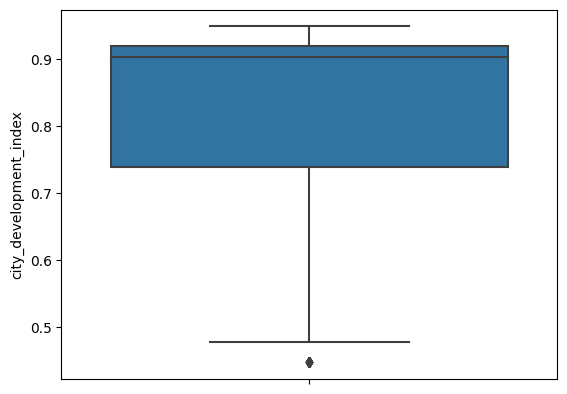

In [29]:
sns.boxplot(y="city_development_index",data=train)

<Axes: xlabel='target'>

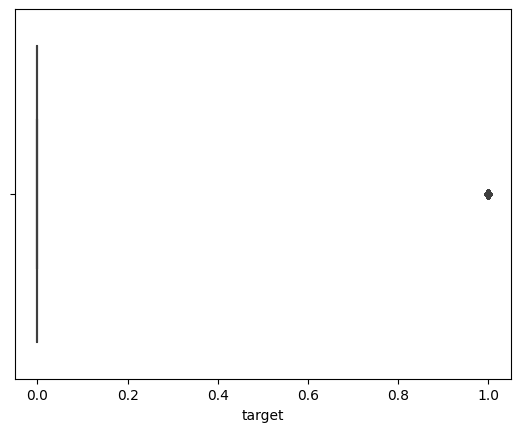

In [30]:
sns.boxplot(x="target",data=train)

<Axes: ylabel='training_hours'>

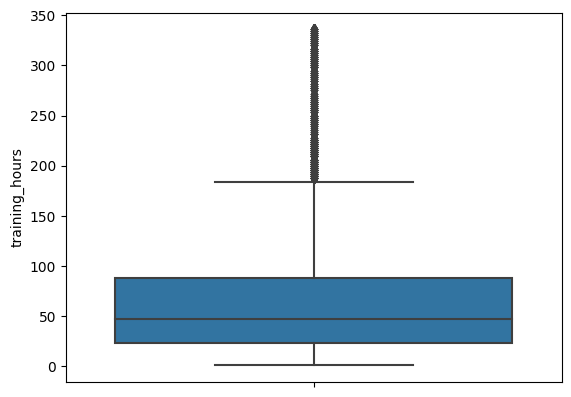

In [31]:
sns.boxplot(y="training_hours",data=train)

* **In training_hours there are outliers which we will goint to remove while training**

Text(0.5, 1.0, 'Outliers Analysis of Training hrs')

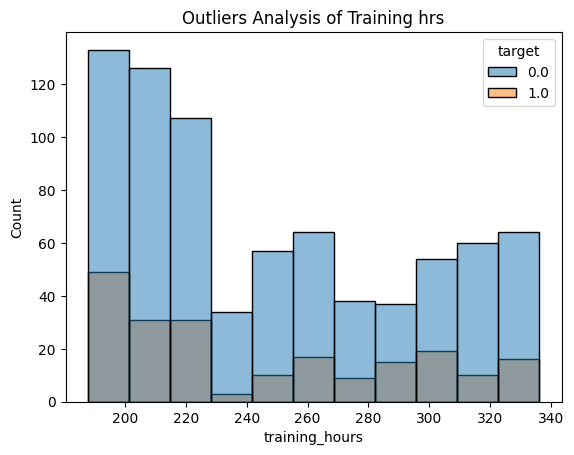

In [32]:
training_hour = train[train['training_hours'] > 184]

sns.histplot(x='training_hours',data=training_hour, hue='target').set_title("Outliers Analysis of Training hrs")

* **Removal of unwanted feactures or columns**

In [33]:
train.drop(["enrollee_id","city","major_discipline","company_type"], axis = 1 , inplace=True)

In [34]:
train.head(4)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,>20,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,50-99,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,5,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,<1,NaN,never,52,1.0


# **DEALING WITH NULL VALUES**

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  19158 non-null  float64
 1   gender                  14650 non-null  object 
 2   relevent_experience     19158 non-null  object 
 3   enrolled_university     18772 non-null  object 
 4   education_level         18698 non-null  object 
 5   experience              19093 non-null  object 
 6   company_size            13220 non-null  object 
 7   last_new_job            18735 non-null  object 
 8   training_hours          19158 non-null  int64  
 9   target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


In [36]:
train.isnull().sum() 

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
experience                  65
company_size              5938
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [37]:
null_percentage = train.isnull().sum() / train.shape[0]
null_percentage

city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
experience                0.003393
company_size              0.309949
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

* **filling null values**

In [38]:
COPY = train
null_columns = null_percentage[null_percentage > 0].index
for i in null_columns:
    train[i] = train[i].fillna(COPY[i].mode()[0])

In [39]:
train.isnull().sum() 

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

#   **columns Formating**

In [40]:
# formating experience column

def experience(x:str)->int:
    if type(x) == int:
        pass
    elif '>' in x: 
        x = 21
    elif '<' in x:
        x = 0
    else:
        x = int(x.strip())
    return x

train['experience'] = train.experience.map(experience)

In [41]:
# formating new_job column

def new_job(x:str)->int:
    
    if type(x) == int:
        pass
    elif 'n' == x[0]:
        x = 0
    elif '>' in x: 
        x = 5
    else:
        x = int(x.strip())
    return x

train['last_new_job'] = train.last_new_job.map(new_job)

In [42]:
train['company_size'].unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [43]:
# formating company_size column

company_size = {
    '<10'       : 0,
    '10/49'     : 1,
    '50-99'     : 2,
    '100-500'   : 3,
    '500-999'   : 4,
    '1000-4999' : 5,
    '5000-9999' : 6,
    '10000+'    : 7
}

train['company_size'] = train.company_size.map(lambda x : company_size[x])

#  **Performing One Hot Encoding**

In [44]:
train.dtypes


city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

In [45]:
train["gender"].unique() 

array(['Male', 'Female', 'Other'], dtype=object)

In [46]:
train["relevent_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [47]:
train["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [48]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(train[["gender","enrolled_university"]]).toarray()

feature_label=ohe.categories_


feature_label=np.array(feature_label).ravel()
print(feature_label)

features=pd.DataFrame(feature_array, columns = feature_label)
train1=pd.concat([train,features], axis=1)



['Female' 'Male' 'Other' 'Full time course' 'Part time course'
 'no_enrollment']


In [49]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(train[["relevent_experience"]]).toarray()

feature_label=ohe.categories_


feature_label=np.array(feature_label).ravel()
print(feature_label)

features=pd.DataFrame(feature_array, columns = feature_label)
final_train=pd.concat([train1,features], axis=1)
final_train.head()

['Has relevent experience' 'No relevent experience']


,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Female,Male,Other,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,21,2,1,36,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,2,5,47,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.624,Male,No relevent experience,Full time course,Graduate,5,2,0,83,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,0,2,0,52,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,21,2,4,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# Now, apply the same changes to the test data.

In [50]:
test.isnull().sum() 

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [51]:
test.drop(["enrollee_id","city","major_discipline","company_type"], axis = 1 , inplace=True)

In [52]:
null_percentage = test.isnull().sum() / test.shape[0]
null_percentage

city_development_index    0.000000
gender                    0.238610
relevent_experience       0.000000
enrolled_university       0.014561
education_level           0.024425
experience                0.002349
company_size              0.292156
last_new_job              0.018788
training_hours            0.000000
dtype: float64

In [53]:
copy = test
null_columns = null_percentage[null_percentage > 0].index
for i in null_columns:
    test[i] = test[i].fillna(copy[i].mode()[0])
    

In [54]:
    
def experience(x:str)->int:
    if type(x) == int:
        pass
    elif '>' in x: 
        x = 21
    elif '<' in x:
        x = 0
    else:
        x = int(x.strip())
    return x

test['experience'] = test.experience.map(experience) 

In [55]:
def new_job(x:str)->int:
    
    if type(x) == int:
        pass
    elif 'n' == x[0]:
        x = 0
    elif '>' in x: 
        x = 5
    else:
        x = int(x.strip())
    return x

test['last_new_job'] = test.last_new_job.map(new_job)

In [56]:
def relavent_exp(x:str)->int:
    
    if type(x) == int:
        pass
    elif 'H' == x[0]:
        x = 1
    elif 'N' in x: 
        x = 0
    else:
        x = int(x.strip())
    return x

test['relevent_experience'] = test.relevent_experience.map(relavent_exp)


In [57]:

company_size = {
    '<10'       : 0,
    '10/49'     : 1,
    '50-99'     : 2,
    '100-500'   : 3,
    '500-999'   : 4,
    '1000-4999' : 5,
    '5000-9999' : 6,
    '10000+'    : 7
}

test['company_size'] = test.company_size.map(lambda x : company_size[x])


In [58]:
test.head(4)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours
0,0.827,Male,1,Full time course,Graduate,9,0,1,21
1,0.920,Female,1,no_enrollment,Graduate,5,2,1,98
2,0.624,Male,0,no_enrollment,High School,0,2,0,15
3,0.827,Male,1,no_enrollment,Masters,11,1,1,39


In [59]:
test.dtypes

city_development_index    float64
gender                     object
relevent_experience         int64
enrolled_university        object
education_level            object
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
dtype: object

In [60]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(train[["gender","enrolled_university"]]).toarray()

feature_label=ohe.categories_


feature_label=np.array(feature_label).ravel()
print(feature_label)

features=pd.DataFrame(feature_array, columns = feature_label)
test1=pd.concat([train,features], axis=1)
test1.head()


['Female' 'Male' 'Other' 'Full time course' 'Part time course'
 'no_enrollment']


,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Female,Male,Other,Full time course,Part time course,no_enrollment
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,21,2,1,36,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,2,5,47,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.624,Male,No relevent experience,Full time course,Graduate,5,2,0,83,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,0,2,0,52,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,21,2,4,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(train[["relevent_experience"]]).toarray()

feature_label=ohe.categories_


feature_label=np.array(feature_label).ravel()
print(feature_label)

features=pd.DataFrame(feature_array, columns = feature_label)
final_test=pd.concat([train1,features], axis=1)
final_test.head()

['Has relevent experience' 'No relevent experience']


,city_development_index,gender,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,Female,Male,Other,Full time course,Part time course,no_enrollment,Has relevent experience,No relevent experience
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,21,2,1,36,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,15,2,5,47,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.624,Male,No relevent experience,Full time course,Graduate,5,2,0,83,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,0,2,0,52,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,21,2,4,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# Logistic Regression 

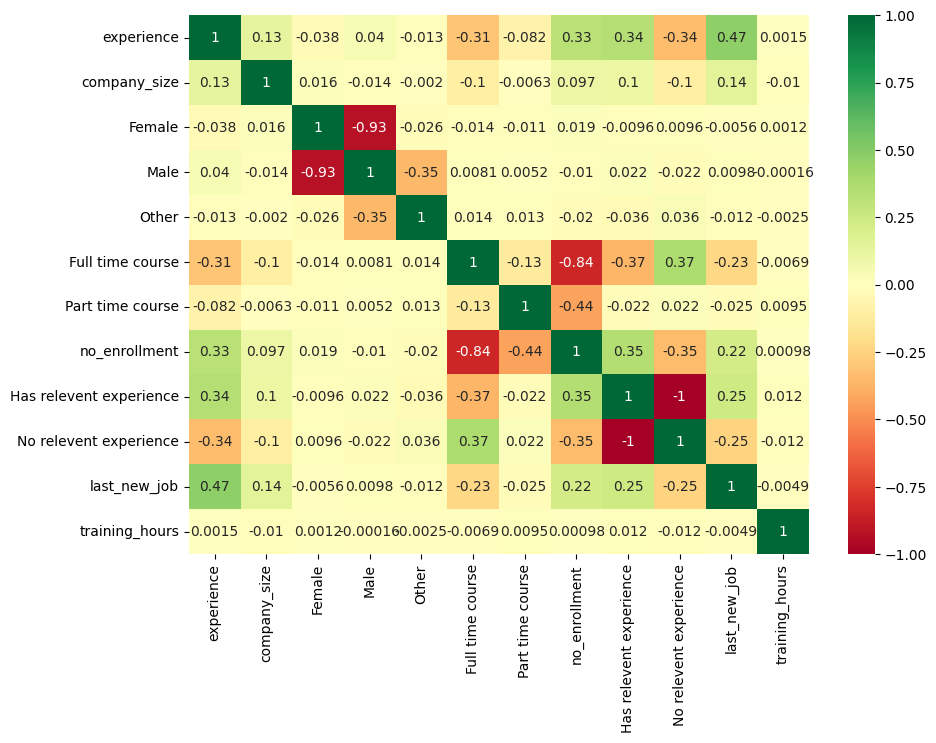

In [62]:
Selected_features = [ 'experience', 'company_size','Female','Male','Other','Full time course','Part time course','no_enrollment',
                       'Has relevent experience','No relevent experience' ,'last_new_job','training_hours']
X1 = final_train[Selected_features]

plt.subplots(figsize=(10, 7))
sns.heatmap(X1.corr(), annot=True, cmap="RdYlGn")
plt.show()

# MODEL

In [63]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

cols = ['experience', 'company_size','Female','Male','Other','Full time course','Part time course','no_enrollment',
        'Has relevent experience','No relevent experience' ,'last_new_job','training_hours'] 
X = final_train[cols]
y = final_train['target']

# create X (features) and y (response)
#X = final_train[Selected_features]
#y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))




Train/Test split results:
LogisticRegression accuracy is 0.748
LogisticRegression log_loss is 0.541
LogisticRegression auc is 0.639


*  **Model evaluation based on simple train/test split using train_test_split() function**


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      2868
         1.0       0.00      0.00      0.00       964

    accuracy                           0.75      3832
   macro avg       0.37      0.50      0.43      3832
weighted avg       0.56      0.75      0.64      3832



Train/Test split results:
LogisticRegression accuracy is 0.748
LogisticRegression log_loss is 0.541
LogisticRegression auc is 0.639


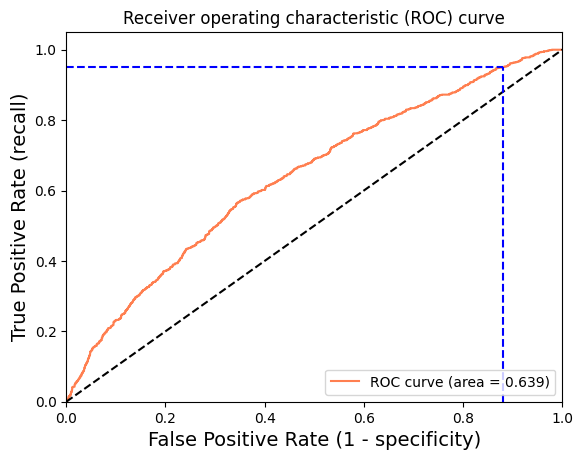

Using a threshold of 0.141 guarantees a sensitivity of 0.950 and a specificity of 0.120, i.e. a false positive rate of 88.01%.


In [65]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

cols = ['experience', 'company_size','Female','Male','Other','Full time course','Part time course','no_enrollment',
        'Has relevent experience','No relevent experience' ,'last_new_job','training_hours']
X = final_train[cols]
y = final_train['target']
# Build a logreg and compute the feature importances
model = LogisticRegression() 

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

* **Model evaluation based on K-fold cross-validation using cross_val_score() function**

In [66]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


K-fold cross-validation results:
LogisticRegression average accuracy is 0.750
LogisticRegression average log_loss is 0.539
LogisticRegression average auc is 0.639
